# EE4375-2022: Fourth Lab Session: Mesh Generation using GMSH 

Gives examples on mesh generation using GMSH.  

## Import Packages

In [1]:
import Gmsh: gmsh 
using GR 
using LinearAlgebra
#using Plots
using LaTeXStrings
using SparseArrays
using GLMakie
using BenchmarkTools 

## (Compulsory) Section 1/2: Example: Unit Square 

Mesh generation for unit square geometry.

Exercises 
1. Visualize the mesh; 
2. Change the mesh density and visualize again;
3. Allow for non-equal mesh density in the four corner points, generate and visualize the mesh;
4. Change the coordinates of the points, generate and visualize the mesh;
5. Change the square to an L-shaped geometry, generate and visualize the mesh; 

Info    : Meshing 1D...
Info    : Meshing curve 5 (Line)
Info    : Meshing curve 6 (Line)
Info    : Meshing curve 7 (Line)
Info    : Meshing curve 8 (Line)
Info    : Done meshing 1D (0.000563 s)
Info    : Meshing 2D...
Info    : Meshing surface 10 (Plane, Delaunay)
Info    : Done meshing 2D (0.000899 s)
Info    : 13 vertices 28 elements


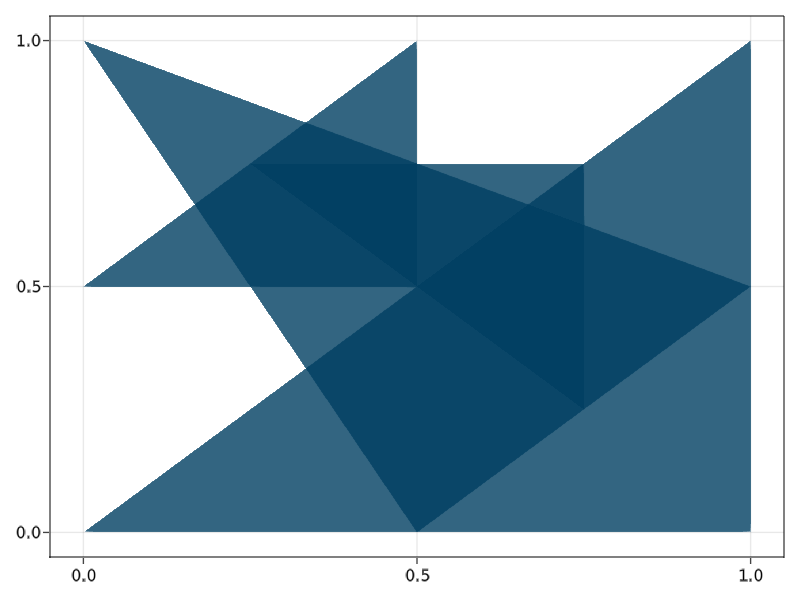

In [5]:
gmsh.initialize()
gmsh.option.setNumber("General.Terminal", 1)
# add name to the model 
gmsh.model.add("square")
# set parameter that controls the density of the mesh on the four points of the geometry 
lc = 5e-1
# add four points with zero z-coordinate and with labels 1 through 4 
# point is formed by 3 coordinates 
gmsh.model.geo.addPoint(0, 0, 0, lc, 1)
gmsh.model.geo.addPoint(1., 0,  0, lc, 2)
gmsh.model.geo.addPoint(1., 1., 0, lc, 3)
gmsh.model.geo.addPoint(0, 1., 0, lc, 4)
# add four lines with labels 5 through 8 
# line is formed by 2 points 
gmsh.model.geo.addLine(1, 2, 5)
gmsh.model.geo.addLine(2, 3, 6)
gmsh.model.geo.addLine(3, 4, 7)
gmsh.model.geo.addLine(4, 1, 8)
# add curve with label 9
# curve is formed by 4 lines 
gmsh.model.geo.addCurveLoop([5, 6, 7, 8], 9)
# add surface with label 10 
# surface is formed by single curve 
gmsh.model.geo.addPlaneSurface([9], 10)
gmsh.model.setPhysicalName(2, 11, "My surface")
gmsh.model.geo.synchronize()
gmsh.model.mesh.generate(2)

#..Extract the nodes from the mesh 
#..Observe that the coordinates are stored contiguously for computational
#..efficiency
node_ids, node_coord, _ = gmsh.model.mesh.getNodes()
nnodes = length(node_ids)
#..sort the node coordinates by ID, such that Node one sits at row 1
tosort = [node_ids node_coord[1:3:end] node_coord[2:3:end]];
sorted = sortslices(tosort , dims = 1);
node_ids = sorted[:,1]
xnode = sorted[:,2]
ynode = sorted[:,3]
xnode = node_coord[1:3:end]
ynode = node_coord[2:3:end]

#..Visualizing the mesh
z = ones(length(xnode))
scene = mesh(xnode,ynode,z)
#gmsh.write("t1.msh")
#gmsh.finalize()


## Section 2/2: Example: Inductor Geometry

Mesh generation for an inductor geometry.

In [6]:
gmsh.initialize()
gmsh.option.setNumber("General.Terminal", 1)
#..define the model
model = gmsh.model
model.add("Transformer")
#..define mesh density near a point
lg = 0.7    #gap length in mm
lg = 5    #gap length in mm
mur = 2000;  #relative permeability of the core
mu0 = 4*pi*10^(-7);
curr_dens_value = 3.1085;
k = 0.2227
cl = 5     #mesh size at bounday
c2 = lg/2  #mesh size at airgap
c3 = 2     #mesh size at component
#..define four points in the geometry
gmsh.model.geo.addPoint(50, 50, 0., cl, 1)
gmsh.model.geo.addPoint(-50, 50, 0., cl, 2)
gmsh.model.geo.addPoint(-50, -50,0., cl, 3)
gmsh.model.geo.addPoint(50, -50, 0., cl, 4)
#..upper half of core
gmsh.model.geo.addPoint(-27.25, lg/2, 0., c2, 5)
gmsh.model.geo.addPoint(-27.25, 27.6+lg/2, 0., c3, 6)
gmsh.model.geo.addPoint(27.25, 27.6+lg/2, 0., c3, 7)
gmsh.model.geo.addPoint(27.25, lg/2, 0., c2, 8)
gmsh.model.geo.addPoint(20.6, lg/2, 0., c2, 9)
gmsh.model.geo.addPoint(20.6, 20.2+lg/2, 0., c3, 10)
gmsh.model.geo.addPoint(7.422, 20.2+lg/2, 0., c3, 11)
gmsh.model.geo.addPoint(7.422, lg/2, 0., c2, 12)
gmsh.model.geo.addPoint(-7.422, lg/2, 0., c2, 13)
gmsh.model.geo.addPoint(-7.422, 20.2+lg/2, 0., c3, 14)
gmsh.model.geo.addPoint(-20.6, 20.2+lg/2, 0., c3, 15)
gmsh.model.geo.addPoint(-20.6, lg/2, 0., c2, 16)
#..lower half of core
gmsh.model.geo.addPoint(-27.25, -lg/2, 0., c2, 17)
gmsh.model.geo.addPoint(-27.25, -27.6-lg/2, 0., c3, 18)
gmsh.model.geo.addPoint(27.25, -27.6-lg/2, 0., c3, 19)
gmsh.model.geo.addPoint(27.25, -lg/2, 0., c2, 20)
gmsh.model.geo.addPoint(20.6, -lg/2, 0., c2, 21)
gmsh.model.geo.addPoint(20.6, -20.2-lg/2, 0., c3, 22)
gmsh.model.geo.addPoint(7.422, -20.2-lg/2, 0., c3, 23)
gmsh.model.geo.addPoint(7.422, -lg/2, 0., c2, 24)
gmsh.model.geo.addPoint(-7.422, -lg/2, 0., c2, 25)
gmsh.model.geo.addPoint(-7.422, -20.2-lg/2, 0., c3, 26)
gmsh.model.geo.addPoint(-20.6, -20.2-lg/2, 0., c3, 27)
gmsh.model.geo.addPoint(-20.6, -lg/2, 0., c2, 28)
#..define four edges in the geometry
gmsh.model.geo.addLine(1, 2, 101)
gmsh.model.geo.addLine(2, 3, 102)
gmsh.model.geo.addLine(3, 4, 103)
gmsh.model.geo.addLine(4, 1, 104)
#..upper half of core
gmsh.model.geo.addLine(5, 6, 105)
gmsh.model.geo.addLine(6, 7, 106)
gmsh.model.geo.addLine(7, 8, 107)
gmsh.model.geo.addLine(8, 9, 108)
gmsh.model.geo.addLine(9, 10, 109)
gmsh.model.geo.addLine(10, 11, 110)
gmsh.model.geo.addLine(11, 12, 111)
gmsh.model.geo.addLine(12, 13, 112)
gmsh.model.geo.addLine(13, 14, 113)
gmsh.model.geo.addLine(14, 15, 114)
gmsh.model.geo.addLine(15, 16, 115)
gmsh.model.geo.addLine(16, 5, 116)
#..lower half of core
gmsh.model.geo.addLine(18, 17, 117)
gmsh.model.geo.addLine(19, 18, 118)
gmsh.model.geo.addLine(20, 19, 119)
gmsh.model.geo.addLine(21, 20, 120)
gmsh.model.geo.addLine(22, 21, 121)
gmsh.model.geo.addLine(23, 22, 122)
gmsh.model.geo.addLine(24, 23, 123)
gmsh.model.geo.addLine(25, 24, 124)
gmsh.model.geo.addLine(26, 25, 125)
gmsh.model.geo.addLine(27, 26, 126)
gmsh.model.geo.addLine(28, 27, 127)
gmsh.model.geo.addLine(17, 28, 128)
# close off winding slots (right to left)
gmsh.model.geo.addLine(21, 9, 129)
gmsh.model.geo.addLine(12, 24, 130)
gmsh.model.geo.addLine(25, 13, 131)
gmsh.model.geo.addLine(16, 28, 132)
# link core area to outside
gmsh.model.geo.addLine(2, 6, 133)
gmsh.model.geo.addLine(19, 4, 134)
gmsh.model.geo.addLine(9, 21, 135)
gmsh.model.geo.addLine(6, 2, 136)
gmsh.model.geo.addLine(4, 19, 137)
gmsh.model.geo.addLine(28,16, 138)
# redefine air gap lines for middle gap
gmsh.model.geo.addLine(24, 12, 139)
gmsh.model.geo.addLine(13, 25, 140)
#..define outer boundary
gmsh.model.geo.addCurveLoop([101, 133, 106, 107, 108, 135, 120, 119, 134, 104], 201) # air 1
gmsh.model.geo.addCurveLoop([102, 103, 137, 118, 117, 128, 138, 116, 105, 136], 202) # air 2
gmsh.model.geo.addCurveLoop([105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116], 203) # upper core
gmsh.model.geo.addCurveLoop([117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128], 204) # lower core
gmsh.model.geo.addCurveLoop([109, 110, 111, 130, 123, 122 , 121, 129], 205) # right winding gap
gmsh.model.geo.addCurveLoop([113, 114, 115, 131, 125, 126 ,127, 132], 206) # left winding gap
gmsh.model.geo.addCurveLoop([112, 140, 124, 139], 207) # middle air gap
#..define planar surface
gmsh.model.geo.addPlaneSurface([201], 301)
gmsh.model.geo.addPlaneSurface([202], 302)
gmsh.model.geo.addPlaneSurface([203], 303)
gmsh.model.geo.addPlaneSurface([204], 304)
gmsh.model.geo.addPlaneSurface([205], 305)
gmsh.model.geo.addPlaneSurface([206], 306)
gmsh.model.geo.addPlaneSurface([207], 307)
#..define physics
gmsh.model.addPhysicalGroup(2,[301; 302; 307],401)
gmsh.model.addPhysicalGroup(2,[303],402)
gmsh.model.addPhysicalGroup(2,[304],403)
gmsh.model.addPhysicalGroup(2,[305],404)
gmsh.model.addPhysicalGroup(2,[306],405)
#..generate the mesh in 2D
gmsh.model.geo.synchronize()
model.mesh.generate(2)
#..save the mesh to file for future reference
#gmsh.write("transformer.msh")

Info    : Meshing 1D...
Info    : Meshing curve 101 (Line)
Info    : Meshing curve 102 (Line)
Info    : Meshing curve 103 (Line)
Info    : Meshing curve 104 (Line)
Info    : Meshing curve 105 (Line)
Info    : Meshing curve 106 (Line)
Info    : Meshing curve 107 (Line)
Info    : Meshing curve 108 (Line)
Info    : Meshing curve 109 (Line)
Info    : Meshing curve 110 (Line)
Info    : Meshing curve 111 (Line)
Info    : Meshing curve 112 (Line)
Info    : Meshing curve 113 (Line)
Info    : Meshing curve 114 (Line)
Info    : Meshing curve 115 (Line)
Info    : Meshing curve 116 (Line)
Info    : Meshing curve 117 (Line)
Info    : Meshing curve 118 (Line)
Info    : Meshing curve 119 (Line)
Info    : Meshing curve 120 (Line)
Info    : Meshing curve 121 (Line)
Info    : Meshing curve 122 (Line)
Info    : Meshing curve 123 (Line)
Info    : Meshing curve 124 (Line)
Info    : Meshing curve 125 (Line)
Info    : Meshing curve 126 (Line)
Info    : Meshing curve 127 (Line)
Info    : Meshing curve 128 (Li